# Measurement of 'Bestness': Neighborhood Speed Bump Density

*Individual Notebook for Stephen Grenesko*
## The Metric

    This particular sub-metric focuses on the amount of speed bumps per neighborhood within the city of Pittsburgh. Based on data from the Western PA Regional Data Center (https://data.wprdc.org/dataset/), we were able to extract a set of data that contained every neighborhood known to have speed bumps, as well as how many speed bumps they had. By utilizing Python along with the pandas and matplotlib libraries, we can use this data to create visualizations to represent said data, providing a clearer image.

## The Data

    For our overall metric of greatness, that of which Pittsburgh neighborhood is the most suitable for drag racing, we selected the speed bump amount per neighborhood as an important sub-metric to analyze due to the inability to go down roads with high speeds. The presence of vast amounts of speed bumps in a neighborhood would hinder such races, preventing drivers from going top speed, or even resulting in flips and crashes. Because of this, we have sorted the data by amount of speed bumps listed in the .csv, which was then passed into a very simple to understand bar graph, which allows one to easily discern which neighborhoods have the least or most amount of speed bumps.

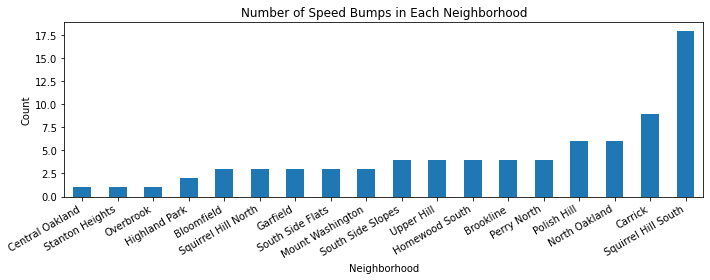

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import data from csv
try:
    bumpData = pd.read_csv("speed_bump_data.csv", index_col="neighborhood")
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

neighborhoodCount = bumpData.groupby('neighborhood').size()

# Sort the neighborhood count data from least to greatest
neighborhoodCount_sorted = neighborhoodCount.sort_values()

# Plot the data on a bar graph
plt.figure(figsize=(10, 4))
neighborhoodCount_sorted.plot(kind='bar')
plt.title('Number of Speed Bumps in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=30, fontsize=10, ha='right')  # Adjust fontsize and alignment
plt.tight_layout()
plt.show()


## A Deeper Dive

    Since there is a tie for neighborhoods with the least amount of speed bumps, we must look further into the dataset. The .csv file contains the exact locations of each bump, and in conjunction with a geoJSON file that draws out a map of Pittsburgh, we can pinpoint where each bump is present. This way we can sift through the choices of the neighborhoods to determine if the one speedbump they have is located in a convinient place for a street race to occur or not.

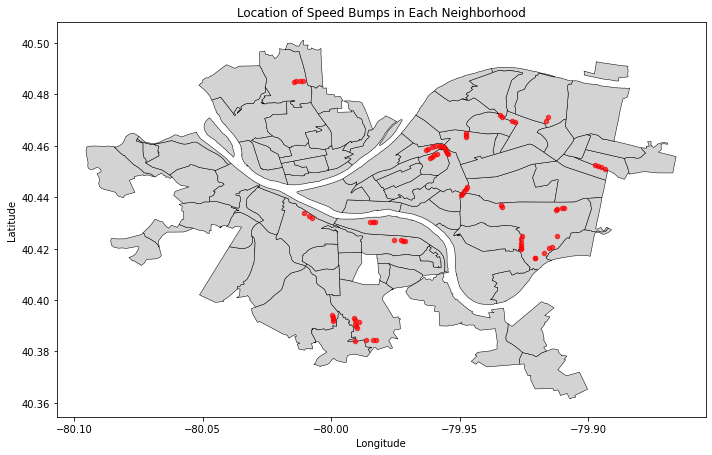

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Import data from csv
try:
    bumpData = pd.read_csv("speed_bump_data.csv")
except FileNotFoundError:
    print("File not found. Please make sure the file path is correct.")
    exit()

# create point objects based on longitude and latitude
def create_point(row):
    return Point(row['longitude'], row['latitude'])

# Create a GeoDataFrame with point geometries
gdf = gpd.GeoDataFrame(bumpData, geometry=bumpData.apply(create_point, axis=1))

# Load the GeoJSON map data
map_data = gpd.read_file("Neighborhoods_.geojson")

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
map_data.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)

# Plot the speed bumps on the map
gdf.plot(ax=ax, color='red', markersize=20, marker='o', alpha=0.7)

# Cre
plt.title('Location of Speed Bumps in Each Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.show()


## The Verdict

    Based upon the given dataset, looking at the neighborhoods to the right of the graph, (this denotes them having the least amount of speed bumps), that the overall best neighborhoods for drag racing would be Central Oakland, Staton Heights, or Overbrook. Since we have several possible options, and we must choose one, we can look at the street maps to determine the placement of said bumps to see how inconvienient they are. Therefore, based on the little amount of speed bumps, (1), and the out of the way placement, the best neighborhood to drag race based on this given data and metric would be Central Oakland.